<h1>Decision Tree </h1>

Decision Trees are versitile machine learning algorithms capable of fitting complex datasets. A decision tree is a flowchart-like tree structure where an internal node represents feature, the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning. This flowchart-like structure helps us in decision making. It's visualization like a flowchart diagram which easily mimics the human level thinking. That is why decision trees are easy to understand and interpret.

In this notebook, first we are using Decision Tree algorithm in 2 time domain features (RMS,IAV) and 2 frequency domain features (Zero crossing rate and spectral slope) from all the channels to build Decision Tree Xlassifier and check its performance. Later we shall be using the same tree on our enitre dataset check its performance and finally find out the feature importace for our decision tree.

Lets start by importing the libraries required for the notebook.

In [1]:
#importing libraries
import pandas as pd #for handling data
import numpy as np #for handling data matrix
import matplotlib.pyplot as plt #for plotting
import matplotlib #for plotting
from sklearn.preprocessing import StandardScaler #for scaling features
from sklearn.model_selection import train_test_split #for creating train and test sets
from sklearn.metrics import precision_score, recall_score, confusion_matrix #evaluation measures
from sklearn.tree import DecisionTreeClassifier,export_graphviz #classifier and plotting the final tree

As this notebook was made using Google Colabration, the features csv has to be read from the google drive with the configurations below:

In [2]:
 #for downloading files in google colab from google drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
 
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)
 
downloaded = drive.CreateFile({'id':'1spjlxMKsa5thVk8ev3HY1GV4HX2qP4P-'})  
downloaded.GetContentFile('sEMG_Features.csv')

<h3> Section 1 </h3>

In this section we shall be building an omptimal Decision Tree Classifier for 2 time domain features (RMS and IAV) and 2 frequency domain features (Spectral slope and Zero Crossing Rate).

In [3]:
 #reading the features csv, selecting 2 time domain and 2 frequency domain features and shuffeling the dataframe
DF = pd.read_csv('sEMG_Features.csv')
DF = DF[['0_RMS', '0_IAV', '0_Zero crossing rate', '0_Spectral slope','1_RMS', '1_IAV', '1_Zero crossing rate', '1_Spectral slope','2_RMS', '2_IAV', '2_Zero crossing rate', '2_Spectral slope','3_RMS', '3_IAV', '3_Zero crossing rate', '3_Spectral slope','4_RMS', '4_IAV', '4_Zero crossing rate', '4_Spectral slope','5_RMS', '5_IAV', '5_Zero crossing rate', '5_Spectral slope','6_RMS', '6_IAV', '6_Zero crossing rate', '6_Spectral slope','7_RMS', '7_IAV', '7_Zero crossing rate', '7_Spectral slope', 'group']]
DF = DF.sample(frac=1, random_state=42) #random_state parameter maintains the random state helps to regenrate the same state or rerunning the code
DF

0_RMS     0_IAV  ...  7_Spectral slope  group
505    0.000037  0.001212  ...         -0.000032      4
13061  0.000103  0.003795  ...         -0.000131      3
25267  0.000212  0.008464  ...         -0.000193      3
15244  0.000011  0.000405  ...         -0.000125      1
25197  0.000156  0.004761  ...         -0.000148      2
...         ...       ...  ...               ...    ...
29802  0.000041  0.001334  ...         -0.000104      6
5390   0.000032  0.001221  ...          0.000010      4
860    0.000010  0.000437  ...         -0.000146      1
15795  0.000026  0.000957  ...         -0.000081      5
23654  0.000018  0.000439  ...         -0.000132      3

[29876 rows x 33 columns]

Now that our dataframe is ready let us create a 'y' vector for labels (gestures) and a 'X' matrix with all the features set.

In [4]:
y = DF.pop('group').values #label vector
X = DF.values #feature matrix
print(X.shape,y.shape) #shape of the matrix X and vector y

(29876, 32) (29876,)


Now our data is ready. We can see that the shape of matrix X is (29876,32) with its labels in a (29876) length vector.

As we know that scaled data always performs better than regular data.So, let us scale the data using StandardScaler.

In [5]:
#scaling the data
std_scaler = StandardScaler() 
X_s = std_scaler.fit_transform(X)

Now that our features matrix has been scaled, we split our data in a ratio of 0.8:0.2 for training and testing purpose. Since our features length is unbalanced among the classes of gestures (number of features for a class is not equal to number of features for another class) we use stratified sampaling to split our dataset.



In [6]:
#splittig training and testing data
X_train, X_test, y_train, y_test = train_test_split(X_s, y, random_state=42, test_size=0.2)

Now as we have splitted our training and testing data let us create a Decision Tree Classifier without any regularization and check its performance.

In [7]:
#training a decision tree classfier
clf = DecisionTreeClassifier() 
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Precision score: 1.0, Recall score: 1.0

 [[3971    0    0    0    0    0]
 [   0 3918    0    0    0    0]
 [   0    0 3981    0    0    0]
 [   0    0    0 3990    0    0]
 [   0    0    0    0 4011    0]
 [   0    0    0    0    0 4029]] 



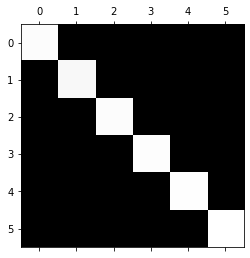

In [8]:
y_train_pred = clf.predict(X_train) #predecting the values for train data
#printing the preformance
print('Precision score: {}, Recall score: {}'.format(precision_score(y_train, y_train_pred, average='weighted'),recall_score(y_train, y_train_pred, average='weighted')))
conf_matrix = confusion_matrix(y_train, y_train_pred)#creating confusion matrix
print('\n',conf_matrix,'\n') #printing confusion matrix
plt.matshow(conf_matrix, cmap=matplotlib.cm.gray)
plt.show() #plotting confusin_matrix

As we can see that this model seems perfect for our training dataset. So, our assumption is that it should also work very well with our test dataset. So lets validate our assumption.

Precision score: 0.7500105537707993, Recall score: 0.7498326639892905

 [[956   9  12   5  27   5]
 [  4 706  78  33  35  74]
 [ 21  73 701  16  34 144]
 [  3  33  16 725 180  66]
 [ 24  49  36 184 701  13]
 [  4  57 176  70  14 692]] 



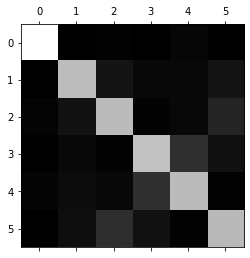

In [9]:
y_test_pred = clf.predict(X_test) #predecting the values for test data
#printing the preformance
print('Precision score: {}, Recall score: {}'.format(precision_score(y_test, y_test_pred, average='weighted'),recall_score(y_test, y_test_pred, average='weighted')))
conf_matrix = confusion_matrix(y_test, y_test_pred)#creating confusion matrix
print('\n', conf_matrix, '\n') #printing confusion matrix
plt.matshow(conf_matrix, cmap=matplotlib.cm.gray)
plt.show() #plotting confusin_matrix

We can see that our model didnt work well with our test dataset. This is because our Decision Tree Classifier is actually over fitting our training dataset. So, its working perfectly on training dataset but not on the test dataset. 

Now to stop the overfitting we have to prune the tree. Pruning the tree is to trim the tree while it is growing so that it doesn't overfit our dataset. 

Thing we have to note with Decission Tree Algorithm is that it is a greedy algorithm which greedily searches for an optimum split at the top level, then repeats the process at each level. It does not check whether or not the split will lead to the lowest possible impurity several levels
down. A greedy algorithm often produces a reasonably good solution, but it is not guaranteed to be the optimal solution

Unfortunately, finding the optimal tree is known to be an  (Nondeterministic Polynomial) NP-Complete  problem it requires O(exp(m)) time, making the problem intractable even for fairly small training sets. This is why we must settle for a “reasonably good” solution.

The following regularized tree is tested to produce resonably good solution for our dataset. These parameters are obtained using hit and traial method.

In [10]:
#training a regularized decision tree
tree = DecisionTreeClassifier(criterion='gini',max_depth=9,min_samples_leaf=5,min_samples_split=15, random_state=42)
tree.fit (X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

Precision score: 0.8173953742620347, Recall score: 0.8171548117154812

 [[3867   13   29    4   56    2]
 [  28 3319  190   82  138  161]
 [  29  302 3152   33  107  358]
 [  16  124   35 3230  396  189]
 [  53  109  103  724 3000   22]
 [  18  262  554  179   54 2962]] 



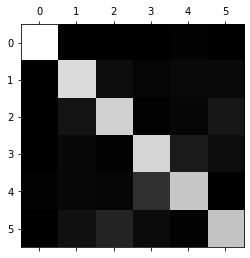

In [11]:
y_train_pred = tree.predict(X_train) #predecting the values for train data
#printing the preformance
print('Precision score: {}, Recall score: {}'.format(precision_score(y_train, y_train_pred, average='weighted'),recall_score(y_train, y_train_pred, average='weighted')))
conf_matrix = confusion_matrix(y_train, y_train_pred)#creating confusion matrix
print('\n',conf_matrix,'\n') #printing confusion matrix
plt.matshow(conf_matrix, cmap=matplotlib.cm.gray)
plt.show() #plotting confusin_matrix

As we can see that the result on training dataset is not perfect like before which means that there is no overfitting of data by this model. Now let us check our performance on test dataset.

Precision score: 0.7829032420648029, Recall score: 0.7821285140562249

 [[970   9  12   0  22   1]
 [  5 766  62  30  21  46]
 [ 14  92 736   9  40  98]
 [  2  27  15 800 111  68]
 [ 21  43  30 222 681  10]
 [  5  78 152  45  12 721]] 



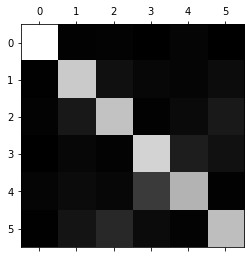

In [12]:
y_test_pred = tree.predict(X_test) #predecting the values for test data
#printing the preformance
print('Precision score: {}, Recall score: {}'.format(precision_score(y_test, y_test_pred, average='weighted'),recall_score(y_test, y_test_pred, average='weighted')))
conf_matrix = confusion_matrix(y_test, y_test_pred)#creating confusion matrix
print('\n', conf_matrix, '\n') #printing confusion matrix
plt.matshow(conf_matrix, cmap=matplotlib.cm.gray)
plt.show() #plotting confusin_matrix

The performance measure is farely good than the previous overfitted module and is also nearly equal to performance on training dataset. Still the result is lower than our expectation. 

So, in contrast to our first hypothesis made in the earlier notebook, a sophistacated algorithm is also not able to perform better on our dataset. This suggests us to repeat the process of feature selection or calculate new features if needed. We shall still be testing our features set on someother algorithms before making any conclusions.

We could visualise the Decision Tree but our Decision Tree is very large and complicated and has to be scaled down in a significant amount which affects its visability and cannot be interpreted.



<h3> Section 2 </h3>

In this section we shall be using the above built classifier for our entire features set. We shall also be finding out the feature importance and plotting them in graph. All the tasks done here are identical to above section.

In [13]:
#reading the data frame again and selecting the entire feature space
DF = pd.read_csv('sEMG_Features.csv',index_col=0)
DF = DF.sample(frac=1, random_state=42) #random_state parameter maintains the random state helps to regenrate the same state or rerunning the code
DF.pop('label')
DF

0_Histogram_0  0_Histogram_1  ...  7_Zero crossing rate  group
505             22.0           28.0  ...                  16.0      4
13061           20.0           30.0  ...                   9.0      3
25267           19.0           31.0  ...                   4.0      3
15244           21.0           29.0  ...                   3.0      1
25197           30.0           20.0  ...                   4.0      2
...              ...            ...  ...                   ...    ...
29802           25.0           25.0  ...                   5.0      6
5390            29.0           21.0  ...                  17.0      4
860             23.0           27.0  ...                   6.0      1
15795           25.0           25.0  ...                   5.0      5
23654           25.0           25.0  ...                   3.0      3

[29876 rows x 105 columns]

In [14]:
y = DF.pop('group').values #label vector
X = DF.values #feature matrix
print(X.shape,y.shape) #shape of the matrix X and vector y

(29876, 104) (29876,)


In [15]:
#scaling and splitting the data for training and testing
X_s = std_scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_s, y, random_state=42, test_size=0.2)

In [16]:
#training the classifier on entire feature set
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=9, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=15,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

Precision score: 0.8189459519491669, Recall score: 0.81836820083682

 [[3861   14   30    4   60    2]
 [  28 3287  217   84  138  164]
 [  27  276 3201   34  108  335]
 [  15  122   36 3240  384  193]
 [  43  109   96  725 3015   23]
 [  18  246  578  179   53 2955]] 



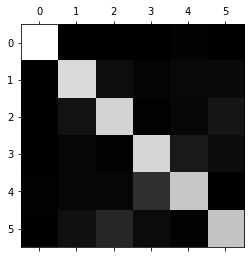

In [17]:
#Evaluating performance on training datasets
y_train_pred = tree.predict(X_train) #predecting the values for train data
#printing the preformance
print('Precision score: {}, Recall score: {}'.format(precision_score(y_train, y_train_pred, average='weighted'),recall_score(y_train, y_train_pred, average='weighted')))
conf_matrix = confusion_matrix(y_train, y_train_pred)#creating confusion matrix
print('\n',conf_matrix,'\n') #printing confusion matrix
plt.matshow(conf_matrix, cmap=matplotlib.cm.gray)
plt.show() #plotting confusin_matrix

Precision score: 0.7834519194253359, Recall score: 0.7824631860776439

 [[969   9  14   1  20   1]
 [  5 754  68  31  23  49]
 [ 15  92 747   9  41  85]
 [  2  26  15 802 108  70]
 [ 23  39  29 226 679  11]
 [  5  70 160  42  11 725]] 



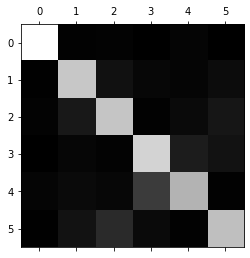

In [18]:
#Evaluating the performance on test datasets
y_test_pred = tree.predict(X_test) #predecting the values for test data
#printing the preformance
print('Precision score: {}, Recall score: {}'.format(precision_score(y_test, y_test_pred, average='weighted'),recall_score(y_test, y_test_pred, average='weighted')))
conf_matrix = confusion_matrix(y_test, y_test_pred)#creating confusion matrix
print('\n', conf_matrix, '\n') #printing confusion matrix
plt.matshow(conf_matrix, cmap=matplotlib.cm.gray)
plt.show() #plotting confusin_matrix

As we can see that the performance of classifier is identical to the previous section. This means that we the feature we choosed in earlier section were relevant for our classifier.

<H4> Feature Importance <h4>
Feature importance is calculated as the decrease in node impurity weighted by the probability of reaching that node. The node probability can be calculated by the number of samples that reach the node, divided by the total number of samples. The higher the value the more important the feature. 

Let us check the feature importance for our entire dataset and plot it using bargraph.

In [19]:
#creating data for feature importance 
map = dict(zip(list(DF.columns.values), tree.feature_importances_))
sorted_map = sorted(map.items(), key=lambda x: x[1], reverse=True)
sorted_data = [sorted_map[i][1] for i in range(0,len(sorted_map))]
sorted_index = [sorted_map[i][0] for i in range(0,len(sorted_map))]

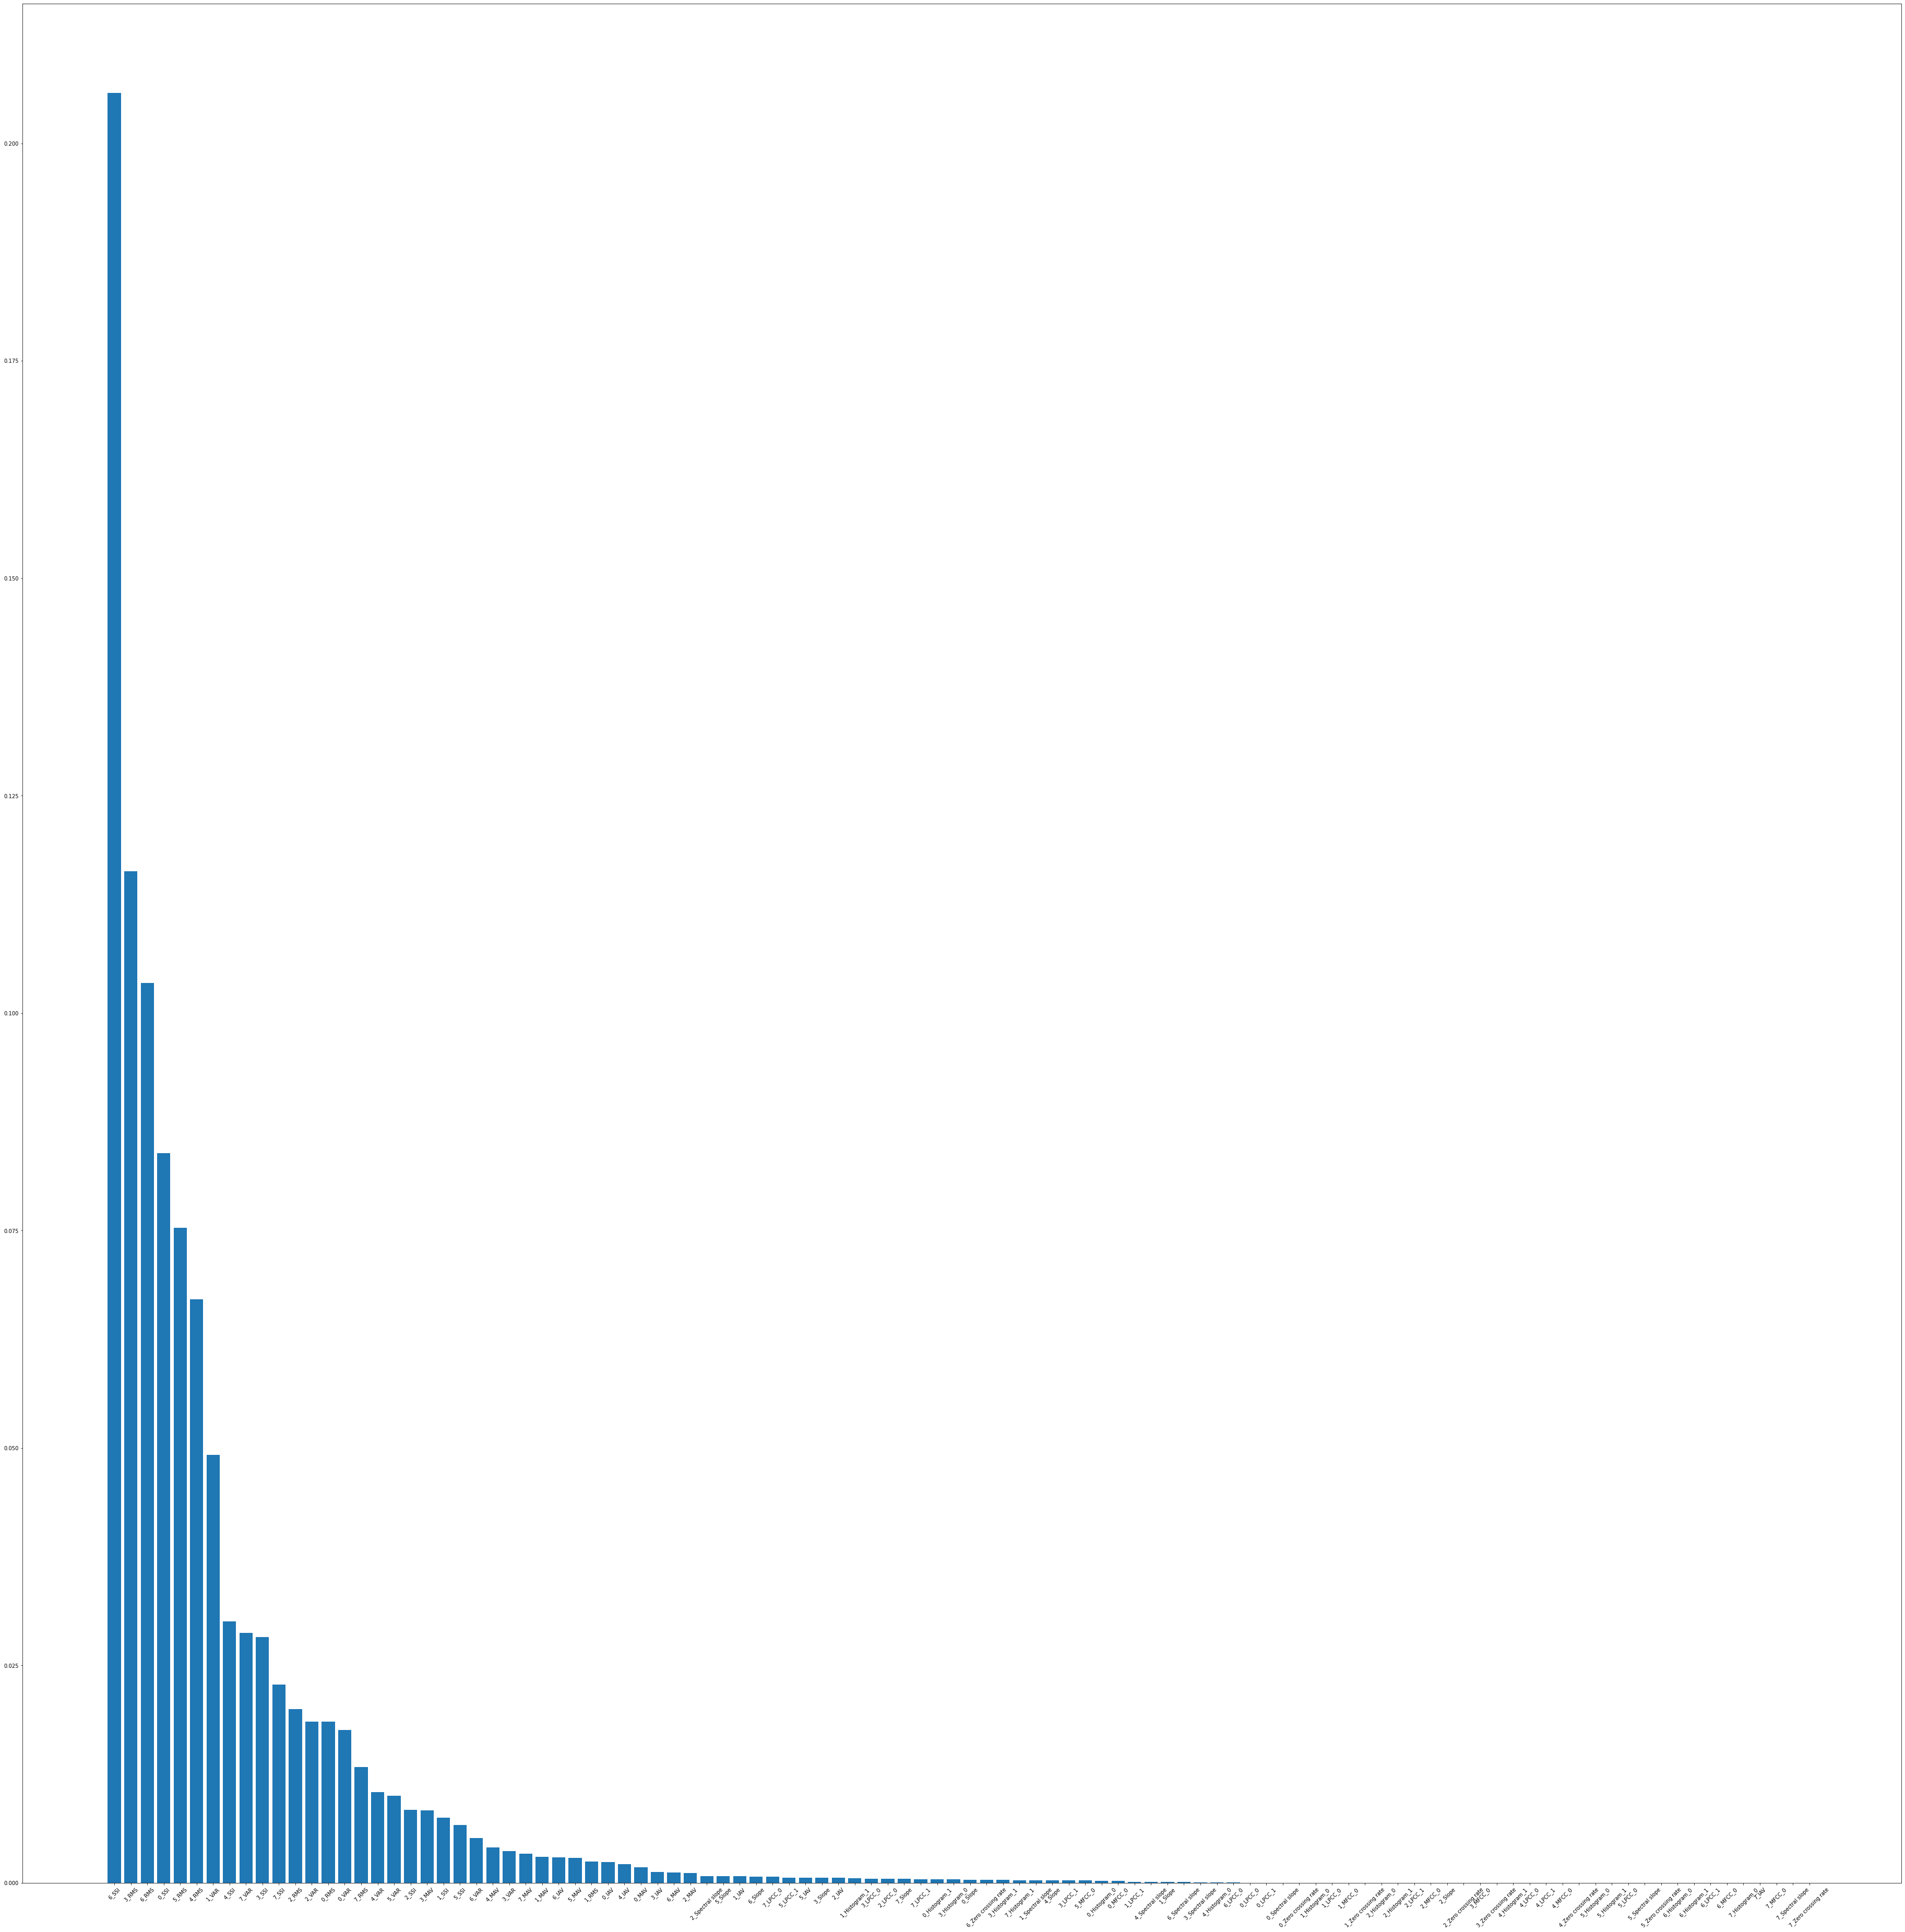

In [20]:
#plotting
fig = plt.figure(figsize=(50,50))
ax = fig.add_axes([0,0,1,1])
ax.bar(sorted_index, sorted_data)
plt.xticks(rotation=45)
plt.yticks()
plt.fig
plt.show()

From the above graph we can see that SSI and RMS followed by VAR and MAV are considered to be the most important features for constructing our final decision tree. One important thing to note here is that since decision tree is an greedy algorithm its choices in selecting the feature channels are random and multiple solutions for optimal exists. But no matter what channel features are selected these set of fetures have a presistant importance while the channel from which these features are comming may differ.


Hence, this completes our study on Decision Tree Classifier.